#Introduction

In contrast to shallow neural networks that are composed of a single hidden layer of neurons, dense neural networks are composed of **multiple hidden layers**. The main difference between the two is that dense neural networks can learn more complex patterns. Another key difference is that shallow neural networks are more likely to overfit the data, while dense neural networks are better at generalizing to new data. Both shallow and dense neural networks have an input and output layer. What makes them shallow or dense is the number of hidden layers that lie between the input and output layers.

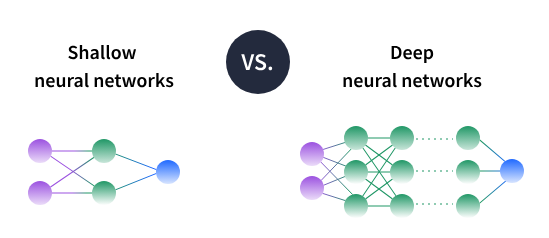

#Load and prepare Dataset

1. Load the mpg dataset from the seaborn library.

1. Perform missing value imputation for the horsepower variable using its median.

1. Drop the irrelevant variable, name, from the dataframe.

1. Replace outliers from the horsepower variable.

1. Perform dummy encoding of the variables: origin, cylinders, and model_year.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = sns.load_dataset('mpg')
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df = df.drop(['name'], axis=1)
df['horsepower'] = np.where(df['horsepower'] > 200, 200, df['horsepower'])
df = pd.get_dummies(df, columns=['cylinders'], drop_first=True, prefix='Cylinder')
df = pd.get_dummies(df, columns=['model_year'], drop_first=True, prefix='Year')
df = pd.get_dummies(df, columns=['origin'], drop_first=True, prefix='Origin')

<ipython-input-3-c837af061c8c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


#Prepare data for modeling

1. define objects for the target variable and predictor variables.

1. Normalize the predictors and scale them to values between 0 and 1.

1. Create arrays for predictor and target variables and store them as X and y, respectively.

1. Create train and test datasets using train_test_split.

In [ ]:
target_variable = ['mpg']
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors] / df[predictors].max()

X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

#Multi-layer Neural Network - Define the model

in the previous lesson, we learned how to define a shallow neural network. Let's look at the code we used to do that:

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(number_of_nodes, input_shape=(X_train.shape[1],), activation=activation_function))

    model.add(tf.keras.layers.Dense(1))

The above code is for **one hidden layer**. However, in a multi-layer deep neural network, we'll want to add multiple hidden layers. This is easy to do with the Sequential API, where hidden layers can be stacked on top of each other to create a deep neural network. For example, if we want to add one more hidden layer, the above code will look something like this:


    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(number_of_nodes, input_shape=(X_train.shape[1],), activation=activation_function))
    model.add(tf.keras.layers.Dense(number_of_nodes_2, activation='relu'))

    model.add(tf.keras.layers.Dense(1))

In [ ]:
target_variable = ['mpg']
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors] / df[predictors].max()

X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape); print(X_test.shape)


#create a Sequential model
model = tf.keras.Sequential()

#configure layers

#1st layer
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))

#2nd layer
model.add(tf.keras.layers.Dense(16, activation='relu'))

#3dr layer
model.add(tf.keras.layers.Dense(8, activation='relu'))

#4th layer
model.add(tf.keras.layers.Dense(4, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(1))

#ADAM optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

#compile the model
model.compile(loss = 'mae', metrics=['mae'], optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=150, verbose=0)

# Evaluate the model
model.evaluate(X_train, y_train)

predictions = model.predict(X_test)
#r2_score(y_array, predictions)

print(predictions)


# Visualize the results
#plt.scatter(y_array, predictions)

(278, 22)
(120, 22)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Invalid dtype: object

In [10]:
target_variable = ['mpg']
predictors = list(set(list(df.columns)) - set(target_variable))
# Convert all predictor columns to numeric type, coercing errors to NaN
for col in predictors:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[predictors] = df[predictors] / df[predictors].max()

X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape); print(X_test.shape)


#create a Sequential model
model = tf.keras.Sequential()

#configure layers

#1st layer
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))

#2nd layer
model.add(tf.keras.layers.Dense(16, activation='relu'))

#3dr layer
model.add(tf.keras.layers.Dense(8, activation='relu'))

#4th layer
model.add(tf.keras.layers.Dense(4, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(1))

#ADAM optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

#compile the model
model.compile(loss = 'mae', metrics=['mae'], optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=150, verbose=0)

# Evaluate the model
model.evaluate(X_train, y_train)

predictions_train = model.predict(X_train)
r2_train = r2_score(y_train, predictions_train)

predictions_test = model.predict(X_test)
r2_test = r2_score(y_test, predictions_test)


print(r2_train)
print(r2_test)


# Visualize the results
plt.scatter(y_test, predictions)
plt.show
#print(y_test)

(278, 22)
(120, 22)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4980 - mae: 1.4980  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
0.9226437406094868
0.8713450672427261


NameError: name 'predictions' is not defined

#Multi-layer Neural Network with ELU Activation Function

On the previous exercise, we learned how to build a multi-layer deep neural network with the **ReLU activation function**.

On this screen, we'll build the multi-layer neural network with the **ELU** activation function, but before we discuss that, let's revisit the **ReLU** function quickly.

We know that the ReLU function is defined as follows:

ReLu(x) = `max(0,x)`

* when x is less than or equal to 0, the value 0 is returned, and
* when x is greater than 0, the value x is returned

The limitation of this function is in cases where we have several **negative** input values, for example, daily stock price changes. In such cases, ReLU will take these negative values and will return a value of zero. This is undesirable because we know stock price changes can be negative, so we'll want to capture this in our activation function.

In situations like these, we can use the **ELU activation function**, which stands for exponential linear unit. The function has a hyperparameter alpha that controls the value when input values are negative. This is explained by the ELU function below:

The ELU function is defined with `alpha` > 0 as:
* when x is less than or equal to 0, the value `alpha * (exp(x) - 1`) is returned, and
* when x is greater than 0, the value x is returned

Note that the `alpha` value is always greater than zero. It takes the default value of one.

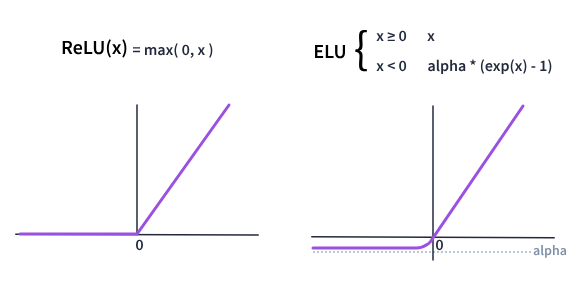

In [ ]:
from sklearn.metrics import r2_score

#create a Sequential model
model = tf.keras.Sequential()

#configure layers

#1st layer
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='elu'))

#2nd layer
model.add(tf.keras.layers.Dense(16, activation='elu'))

#3dr layer
model.add(tf.keras.layers.Dense(8, activation='elu'))

#4th layer
model.add(tf.keras.layers.Dense(4, activation='elu'))

#output layer
model.add(tf.keras.layers.Dense(1))

#ADAM optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

#compile the model
model.compile(loss = 'mae', metrics=['mae'], optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=150, verbose=0)

# Evaluate the model
model.evaluate(X_train, y_train)

predictions_train = model.predict(X_train)
r2_train = r2_score(y_train, predictions_train)

predictions_test = model.predict(X_test)
r2_test = r2_score(y_test, predictions_test)


print(r2_train)
print(r2_test)


# Visualize the results
#plt.scatter(y_array, predictions)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4784 - mae: 1.4784  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
0.9198980792306377
0.8660638401970497


#Multi-layer Neural Network with SGD Optimizer


On the previous exercises, we learned how to build a multi-layer deep neural network with ReLU and ELU activation functions.

We achieved the R-squared value of:

* 0.92 on train data and 0.86 on test data with the **ReLU** activation function.

* 0.91 on train data and 0.87 on test data with the **ELU** activation function.

Apart from the activation functions, another important factor in the deep neural network architecture is the **optimizer**. Until now, we've been using the `Adam` optimizer, but there are other optimizers we can use. One such optimizer is the **stochastic gradient descent optimizer**, represented by the `SGD class ` in TensorFlow's Keras.

`SGD` works by iteratively moving through the weights and updating them based on how well they are performing. `SGD` optimizes a function by iteratively moving in the direction of steepest descent, as defined by the negative gradient of the function. In simple terms, the goal is to find the set of weights that results in the lowest error rate.

Keras allows us to specify many different parameters for SGD, such as the `learning_rate`, `momentum`, etc.

`Momentum` is another parameter that accelerates the gradient descent in the suitable direction. The momentum parameter takes values greater than or equal to zero, and the default value is zero. You can access the `SGD class` through
`tf.keras.optimizers.SGD()`

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6898 - mae: 1.6898  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.9064558702653168
0.8777893474480117


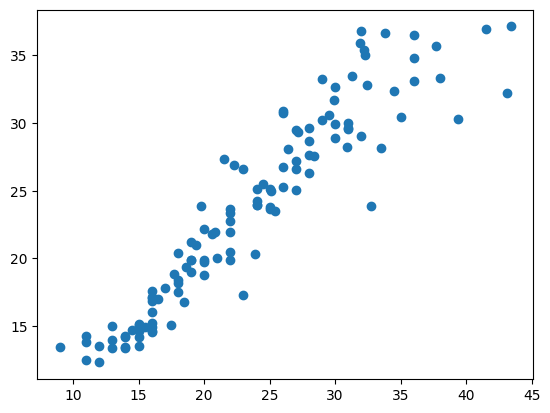

In [ ]:
#create a Sequential model
model = tf.keras.Sequential()

#configure layers

#1st layer
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='elu'))

#2nd layer
model.add(tf.keras.layers.Dense(16, activation='elu'))

#3dr layer
model.add(tf.keras.layers.Dense(8, activation='elu'))

#4th layer
model.add(tf.keras.layers.Dense(4, activation='elu'))

#output layer
model.add(tf.keras.layers.Dense(1))

#SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5)

#compile the model
model.compile(loss = 'mae', metrics=['mae'], optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=150, verbose=0)

# Evaluate the model
model.evaluate(X_train, y_train)

predictions_train = model.predict(X_train)
r2_train = r2_score(y_train, predictions_train)

predictions_test = model.predict(X_test)
r2_test = r2_score(y_test, predictions_test)


print(r2_train)
print(r2_test)


# Visualize the results
plt.scatter(y_test, predictions_test)
plt.show()

#Multi-layer Neural Network with RMSprop Optimizer

We now have learned how to use the SGD optimizer to build a multi-layer deep neural network. One more popular optimizer choice is Root Mean Square Propagation, represented by the RMSprop class in the `tf.keras.optimizers module.`

It works by keeping track of the moving average of the squares of the gradients and dividing this by the square root of the sum of all previous squared gradients. This results in faster learning for models with many training examples.

Apart from `learning_rate`, another important argument in the RMSprop optimizer is `rho`, which is a discounting factor that is applied to the history/coming gradient. A **higher** rho value means that the learning rate will decay **more slowly**, which can help the optimization process converge on a better solution. However, too high of a rho value can also lead to problems such as overfitting. The best value for any given problem will depend on the specifics of the data and model being used. It has a default value of 0.9. You can look at all the parameters for RMSprop in the official documentation here.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2051 - mae: 3.2051  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
0.7424965031290358
0.6460519547197263


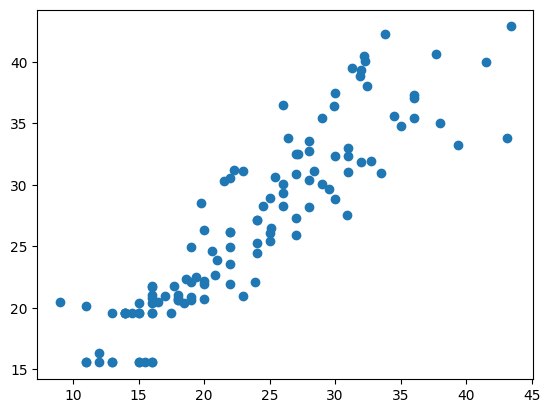

In [ ]:
#create a Sequential model
model = tf.keras.Sequential()

#configure layers

#1st layer
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))

#2nd layer
model.add(tf.keras.layers.Dense(16, activation='relu'))

#3dr layer
model.add(tf.keras.layers.Dense(8, activation='relu'))

#4th layer
model.add(tf.keras.layers.Dense(4, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(1))

#RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1,rho=0.8)

#compile the model
model.compile(loss = 'mae', metrics=['mae'], optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=150, verbose=0)

# Evaluate the model
model.evaluate(X_train, y_train)

predictions_train = model.predict(X_train)
r2_train = r2_score(y_train, predictions_train)

predictions_test = model.predict(X_test)
r2_test = r2_score(y_test, predictions_test)


print(r2_train)
print(r2_test)


# Visualize the results
plt.scatter(y_test, predictions_test)
plt.show()

 #Changing Configurations at Node and Activation Functions

So far in this lesson, we've worked with a multi-layer architecture comprised of four hidden layers and set the number of nodes for each layer as is summarized below:

* 1st hidden layer: **32** nodes, an `input_shape` equal to the number of variables in `X_train` as a tuple.

* 2nd hidden layer: **16** nodes.

* 3rd hidden layer: **8** nodes.

* 4th hidden layer: **4** nodes.

However, it's possible to add several more layers to the neural network and also change the configuration of the nodes.

In all the neural networks we've built so far, we only used one type of activation function when adding a new layer to the model. However, it's possible to use a different activation function for each hidden layer in a multi-layer deep neural network.

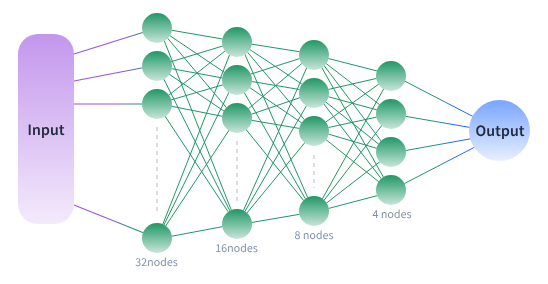

##Exercise

1.Instantiate a multi-layer model and assign it to the variable model with the following specifications for the hidden layers:

* 1st hidden layer: 500 nodes, an input_shape equal to the number of variables in X_train as a tuple.

* 2nd hidden layer: 300 nodes.

* 3rd hidden layer: 100 nodes.

* 4th hidden layer: 20 nodes.

* Add a 5th hidden layer with 4 nodes just before the output layer.

2.Add an output layer with just one node.

3.Use the '`relu`' activation function for the first two hidden layers, and '`elu`' as the activation function for the next three hidden layers.

4.Compile, fit, and evaluate the model on the train and test datasets, using the same parameters as on the previous screen. Print the results of evaluating the model on each dataset.

5.Generate predictions on the train and test data and use them to compute the associated R-squared value. Print both R-squared values.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6144 - mae: 2.6144  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
0.8190065511597354
0.7594272627877081


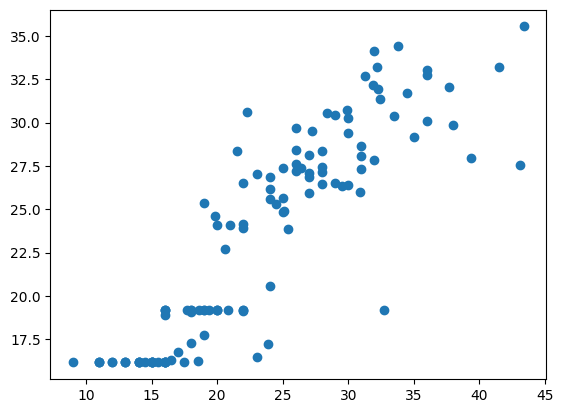

In [ ]:
#create a Sequential model
model = tf.keras.Sequential()

#configure layers

#1st layer - relu function
model.add(tf.keras.layers.Dense(500, input_shape=(X_train.shape[1],), activation='relu'))

#2nd layer - relu function
model.add(tf.keras.layers.Dense(300, activation='relu'))

#3dr layer - elu function
model.add(tf.keras.layers.Dense(100, activation='elu'))

#4th layer - elu function
model.add(tf.keras.layers.Dense(20, activation='elu'))

#5th layer - elu function
model.add(tf.keras.layers.Dense(4, activation='elu'))

#output layer
model.add(tf.keras.layers.Dense(1))

#RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1,rho=0.8)

#compile the model
model.compile(loss = 'mae', metrics=['mae'], optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=150, verbose=0)

# Evaluate the model
model.evaluate(X_train, y_train)

predictions_train = model.predict(X_train)
r2_train = r2_score(y_train, predictions_train)

predictions_test = model.predict(X_test)
r2_test = r2_score(y_test, predictions_test)


print(r2_train)
print(r2_test)


# Visualize the results
plt.scatter(y_test, predictions_test)
plt.show()

#Conclusion

During the course of this lesson, we built multi-layer deep neural network models with varying activation functions and optimizers, and the comparative summary of the same is presented below:

We achieved an R-squared value of:

* 0.92 on train data and 0.86 on test data with the ReLU activation function and Adam optimizer.

* 0.91 on train data and 0.87 on test data with the ELU activation function and Adam optimizer.

* 0.85 on train data and 0.81 on test data with the ELU activation function and SGD optimizer.

* 0.83 on train data and 0.75 on test data with the ReLU activation function and RMSprop optimizer.

* 0.85 on train data and 0.82 on test data by changing node configurations and using a mix of ReLU and ELU activation functions at various layers, with Adam optimizer.

The above comparison shows that the first two models perform the best on train and test data. Overall, the performance of the remaining models is also good
